In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line

In [2]:
targetdir = '/Users/aimachine/Documents/KymoGraphLineScans/Result/'

Actinimage = '/Users/aimachine/Documents/KymoGraphLineScans/LineScanTime.tif'

Membraneimage = '/Users/aimachine/Documents/KymoGraphLineScans/LineScanTime-shift.tif'

#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.212
#Enter the number of pixels to be included in the fit
Fitaround = 20
#Symmetric psf as input (pixels)
psf =2

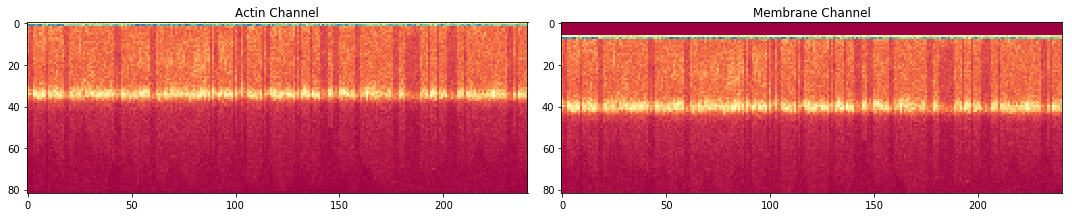

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')


/Users/aimachine/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aimachine/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Ransac Slope =  2.643e-05
Regression Slope =  3.490e-05
Mean Thickness (After outlier removal) =  1.212 um


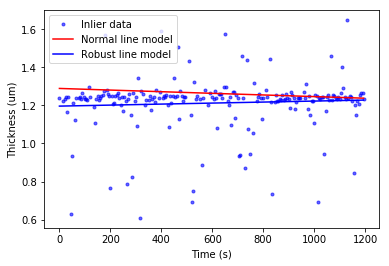

In [5]:

Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, Fitaround, psf)
Thickness_time = np.column_stack([Time, Thickness])

show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)